### About this dataset

**Context:** \
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets] \
 \
**Content:** \
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

 \
**Inspiration:** \
To explore this type of models and learn more about the subject.

gender \
Whether the customer is a male or a female


SeniorCitizen \
Whether the customer is a senior citizen or not (1, 0)


Partner \
Whether the customer has a partner or not (Yes, No)


Dependents \
Whether the customer has dependents or not (Yes, No)


tenure \
Number of months the customer has stayed with the company


PhoneService \
Whether the customer has a phone service or not (Yes, No)


MultipleLines \
Whether the customer has multiple lines or not (Yes, No, No phone service)


InternetService \
Customer’s internet service provider (DSL, Fiber optic, No)


OnlineSecurity \
Whether the customer has online security or not (Yes, No, No internet service)


DeviceProtection \
Whether the customer has device protection or not (Yes, No, No internet service)


TechSupport \
Whether the customer has tech support or not (Yes, No, No internet service)


StreamingTV \
Whether the customer has streaming TV or not (Yes, No, No internet service)


StreamingMovies \
Whether the customer has streaming movies or not (Yes, No, No internet service)


Contract \
The contract term of the customer (Month-to-month, One year, Two year)


PaperlessBilling \
Whether the customer has paperless billing or not (Yes, No)


PaymentMethod \
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


MonthlyCharges \
The amount charged to the customer monthly


TotalCharges \
The total amount charged to the customer


Churn \
Whether the customer churned or not (Yes or No)

### Data Loading and Exploration

In [266]:
import numpy as np
import pandas as pd
from pandas.core.interchange.dataframe_protocol import DataFrame

df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")

df.iloc[:1]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


#### Understanding each Column

In [267]:
df.groupby("MultipleLines").size()

MultipleLines
No                  3390
No phone service     682
Yes                 2971
dtype: int64

In [268]:
df.groupby("InternetService").size()

InternetService
DSL            2421
Fiber optic    3096
No             1526
dtype: int64

In [269]:
df.groupby("OnlineSecurity").size()

OnlineSecurity
No                     3498
No internet service    1526
Yes                    2019
dtype: int64

In [270]:
df.groupby("OnlineBackup").size()

OnlineBackup
No                     3088
No internet service    1526
Yes                    2429
dtype: int64

In [271]:
df.groupby("DeviceProtection").size()

DeviceProtection
No                     3095
No internet service    1526
Yes                    2422
dtype: int64

In [272]:
df.groupby("TechSupport").size()


TechSupport
No                     3473
No internet service    1526
Yes                    2044
dtype: int64

In [273]:
df.groupby("StreamingTV").size()


StreamingTV
No                     2810
No internet service    1526
Yes                    2707
dtype: int64

In [274]:
df.groupby("Contract").size()


Contract
Month-to-month    3875
One year          1473
Two year          1695
dtype: int64

In [275]:
df.groupby("PaymentMethod").size()


PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
dtype: int64

### Binary Encoding

**Binary Variables:** \
gender \
SeniorCitizen - already 0/1 \
Partner \
Dependents \
PhoneService \
PaperlessBilling

Output: Churn


In [276]:
'''
Alternatively:  ------

df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Partner"] = df["Partner"].apply(lambda x: 1 if x == "Yes" else 0)
df["Dependents"] = df["Dependents"].apply(lambda x: 1 if x == "Yes" else 0)
df["PhoneService"] = df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0)
df["PaperlessBilling"] = df["PaperlessBilling"].apply(lambda x: 1 if x == "Yes" else 0)
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
'''



binary_cols = [
    'PhoneService', 'PaperlessBilling', 'Churn', 'gender', 'Partner', 'Dependents'
    ]

df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})


/var/folders/dj/6n73kpm10ls582gfzn5ng6lm0000gn/T/ipykernel_46461/2227118778.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [277]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


### One Hot Encoding

**Columns with > 2 values:** \
    MultipleLines \
    InternetService \
    OnlineSecurity \
    OnlineBackup \
    DeviceProtection \
    TechSupport \
    StreamingTV \
    StreamingMovies \
    Contract \
    Payment Method

In [278]:
# Categorical columns with > 2 unique values
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
    ]

#One-hot encode
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [279]:
bool_cols = df.select_dtypes(['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [280]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


### Cleaning

There is no need to normalize because we are using XGBoost and normalization will slow performance

In [281]:
df = df.drop(["customerID"], axis=1)

In [282]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

### Correlations

In [284]:
corr_mat = df.corr(numeric_only = True)
corr_mat = corr_mat[["Churn"]].sort_values(by='Churn', ascending=False)

In [285]:
corr_mat

,Churn
Churn,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102
PhoneService,0.011942


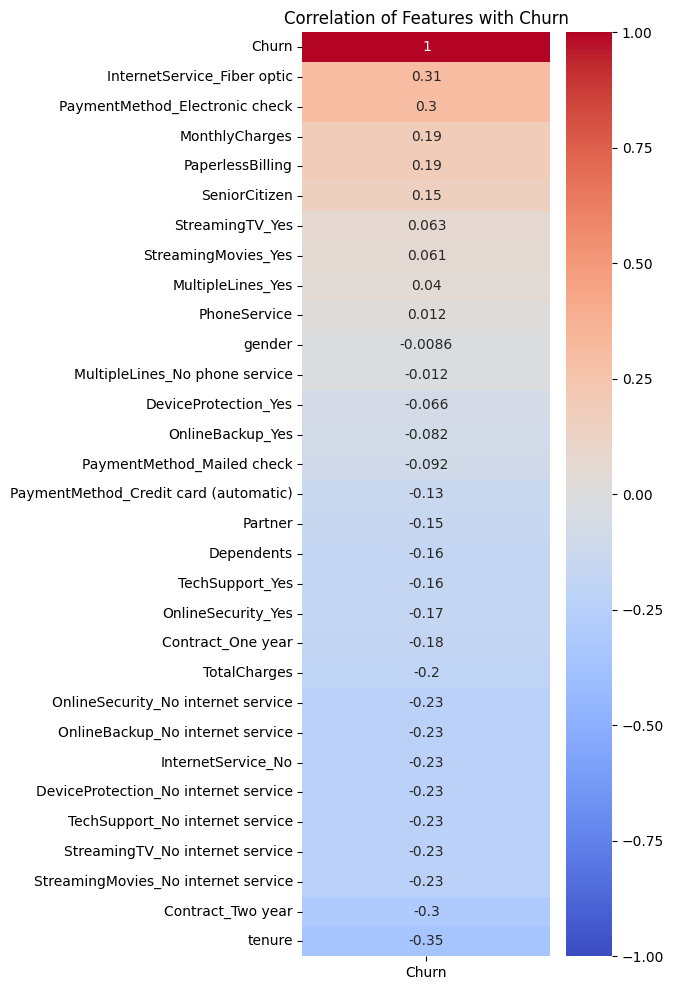

In [286]:
# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

Negative (lower value → less likely to churn):
- tenure (-0.35) → Customers who stay longer are less likely to churn.
- Contract_Two year (-0.30) → Customers on long-term contracts churn much less.
- Contract_One year (-0.18) → Same trend but weaker than two-year contracts.

Positive (higher value → more likely to churn):
- InternetService_Fiber optic (+0.31) → Fiber optic users churn more in this dataset.
- PaymentMethod_Electronic check (+0.30) → Customers paving electronically via check churn more.

### VIF multicolinearity

In [287]:
import numpy as np

X = df.drop('Churn', axis=1)
X = X.replace([np.inf, -np.inf], np.nan)
bool_cols = X.select_dtypes (include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)
X = X.dropna()

In [288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

vif_data

,feature,VIF
15,OnlineBackup_No internet service,inf
12,InternetService_No,inf
19,TechSupport_No internet service,inf
17,DeviceProtection_No internet service,inf
23,StreamingMovies_No internet service,inf
13,OnlineSecurity_No internet service,inf
21,StreamingTV_No internet service,inf
5,PhoneService,1773.528816
7,MonthlyCharges,866.089640
11,InternetService_Fiber optic,148.500814


### Machine Learning

In [289]:
import torch
from sklearn.model_selection import train_test_split

X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
THRESHOLD = 0.3


#### LightGBM


In [290]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, mean_squared_error
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f" Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test) [:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() -start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

# Mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

 Training time: 2.21 seconds
Prediction time: 0.0106 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.733     0.748      1409

Mean Squared Error: 0.2668559261887864


#### XGBoost

In [291]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error, roc_curve, auc
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f" Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test) [:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() -start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

fpr, tpr, _ = roc_curve(y_test, proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

 Training time: 0.54 seconds
Prediction time: 0.0063 seconds
Mean Squared Error: 0.2725
AUC: 0.829
              precision    recall  f1-score   support

           0      0.912     0.697     0.790      1035
           1      0.492     0.813     0.613       374

    accuracy                          0.727      1409
   macro avg      0.702     0.755     0.701      1409
weighted avg      0.800     0.727     0.743      1409



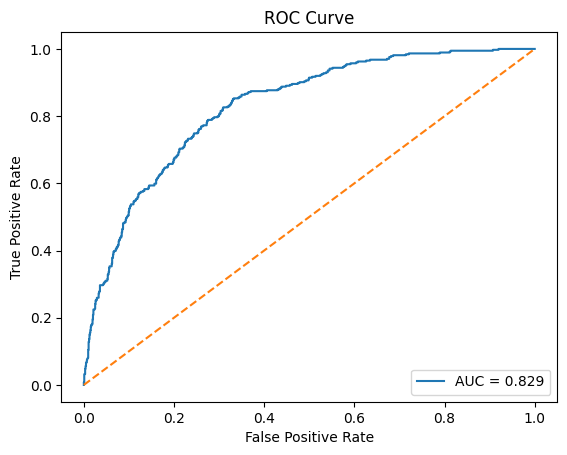

In [292]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

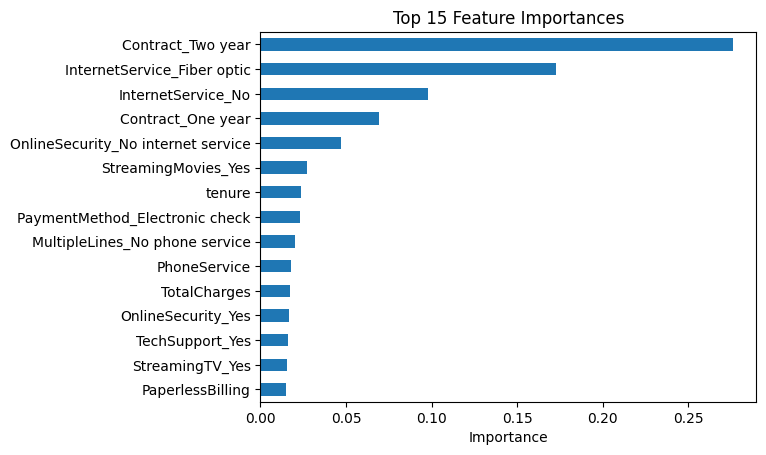

In [293]:
importances = xgb.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False).head(15)

plt.figure()
feat_imp.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.show()

In [294]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test) [:, 1]
print("Threshold tuning for XGBoost")
print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")

for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.60, 0.75, 0.80, .9, .99]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label= 1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    sum = f1 + rec + prec
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")



Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.481   0.853   0.615   
0.3     0.492   0.813   0.613   
0.35    0.504   0.789   0.615   
0.4     0.517   0.762   0.616   
0.45    0.536   0.722   0.615   
0.5     0.543   0.690   0.608   
0.6     0.576   0.618   0.596   
0.75    0.662   0.460   0.543   
0.8     0.681   0.388   0.494   
0.9     0.781   0.201   0.319   
0.99    0.800   0.011   0.021   


### Tune For Hyperparameters w/ optuna and MLFlow

In [295]:
from sklearn.model_selection import train_test_split
# -----------------------------
# 1) Split TRAIN into train/valid (avoid test leakage)
# -----------------------------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

scale_pos_weight = (y_tr == 0).sum() / (y_tr == 1).sum()


Optuna will iterively search through hyperparameters to try to find the most optimal ones based on the optimizaiton function. In this case, we will try to optimize recall to precisely find the True Positive employees who will try to churn.

In [296]:
import optuna
from xgboost import XGBClassifier
# -----------------------------
# 2) Optuna objective (tune model + threshold on VALID)
# -----------------------------
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss",
    }

    threshold = trial.suggest_float("threshold", 0.10, 0.90)

    model = XGBClassifier(**params)
    model.fit(X_tr, y_tr)

    proba_val = model.predict_proba(X_val)[:, 1]
    pred_val = (proba_val >= threshold).astype(int)

    # optimize recall on churners
    return recall_score(y_val, pred_val, pos_label=1)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

best_params = study.best_params.copy()
best_threshold = best_params.pop("threshold")

print("Best Params:", best_params)
print("Best Threshold:", best_threshold)
print("Best Val Recall:", study.best_value)

Best Params: {'n_estimators': 315, 'learning_rate': 0.13921188497432835, 'max_depth': 8, 'subsample': 0.9256043686192132, 'colsample_bytree': 0.5001584770586809, 'min_child_weight': 1, 'gamma': 4.693841768886307, 'reg_alpha': 0.06029948970338106, 'reg_lambda': 0.44488158398986216}
Best Threshold: 0.10086528058475329
Best Val Recall: 0.9899665551839465


In [297]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report
import time
# -----------------------------
# 3) Train final model on full TRAIN, evaluate once on TEST
# -----------------------------
xgb = XGBClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="logloss",
)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train

start_pred = time.time()
proba_test = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba_test >= best_threshold).astype(int)
pred_time = time.time() - start_pred

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, proba_test)

print(f"Train time: {train_time:.2f}s | Pred time: {pred_time:.4f}s")
print(classification_report(y_test, y_pred, digits=3))


Train time: 0.21s | Pred time: 0.0045s
              precision    recall  f1-score   support

           0      0.981     0.346     0.511      1035
           1      0.352     0.981     0.518       374

    accuracy                          0.515      1409
   macro avg      0.666     0.664     0.515      1409
weighted avg      0.814     0.515     0.513      1409



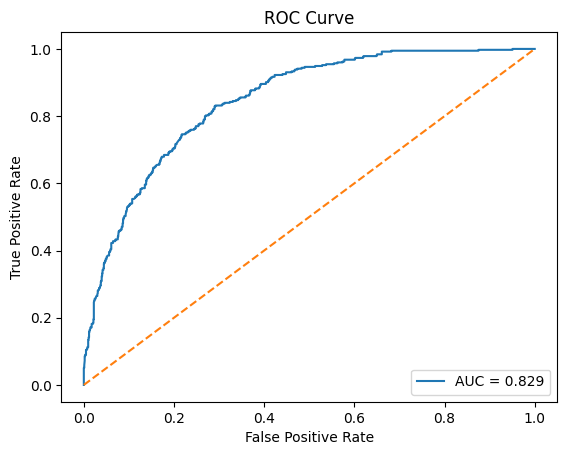

In [302]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

MLFlow is being used here for reproducability for the optimized hyperparameter set. It will save all data on the best model and set it up to be containerized

In [298]:
import mlflow.sklearn
import os

# -----------------------------
# 4) MLflow logging (project-root mlruns)
# -----------------------------
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # log params + threshold
    mlflow.log_params(best_params)
    mlflow.log_param("threshold", best_threshold)

    # log timing + metrics
    mlflow.log_metric("train_time", train_time)
    mlflow.log_metric("pred_time", pred_time)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # save model
    mlflow.sklearn.log_model(sk_model=xgb, name="model")


2026/02/12 01:09:31 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/dj/6n73kpm10ls582gfzn5ng6lm0000gn/T/tmpcf74arhf/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.8.0', 'cloudpickle==3.1.2']. Set logging level to DEBUG to see the full traceback. 
